# Importing libraries and understanding data

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.iloc[:10]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
df.shape

(200, 5)

In [81]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [82]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data preprocessing

In [83]:
df.Gender.nunique()

2

In [84]:
df.Age.nunique()

51

In [85]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [86]:
df.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [87]:
df.rename(columns={'Annual Income (k$)' :	'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [88]:
df.corr()

<ipython-input-88-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual_Income,Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income,0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


#visualization

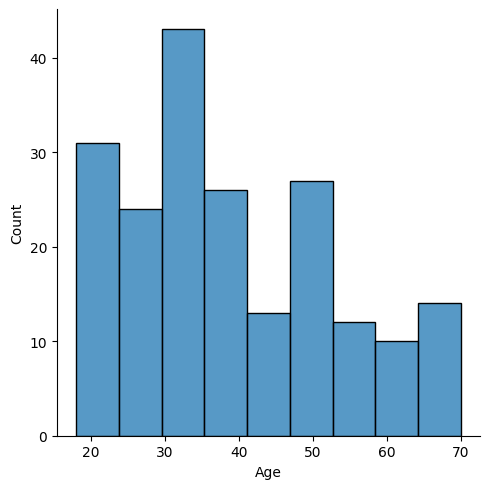

In [89]:
sns.displot(df.Age)

<Axes: ylabel='Gender'>

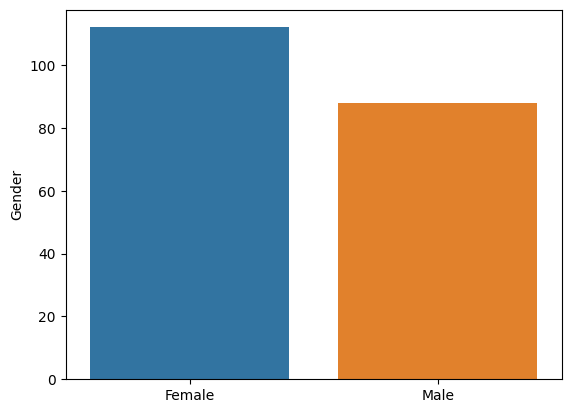

In [90]:

sns.barplot(x =df.Gender.value_counts().index,y =df.Gender.value_counts() )

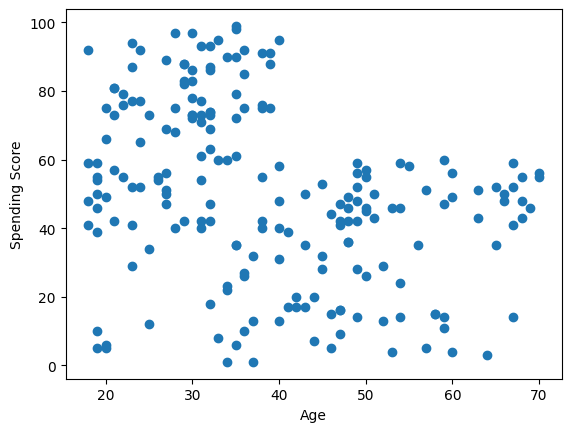

In [97]:
#encoding categorical data
plt.scatter(df['Age'], df['Spending_Score'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

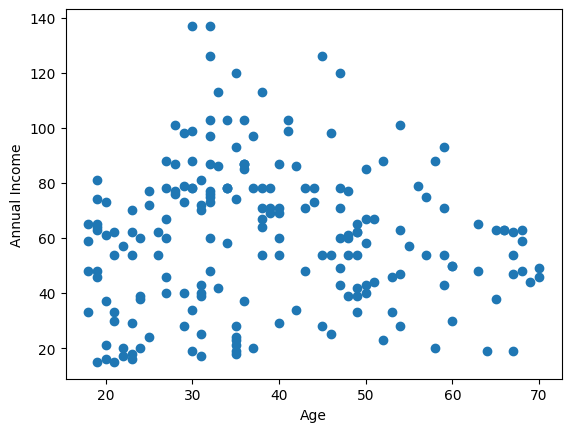

In [95]:
plt.scatter(df['Age'], df['Annual_Income'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

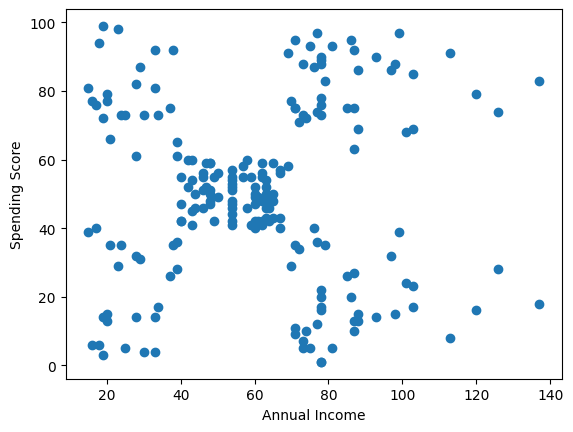

In [98]:
plt.scatter(df['Annual_Income'], df['Spending_Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

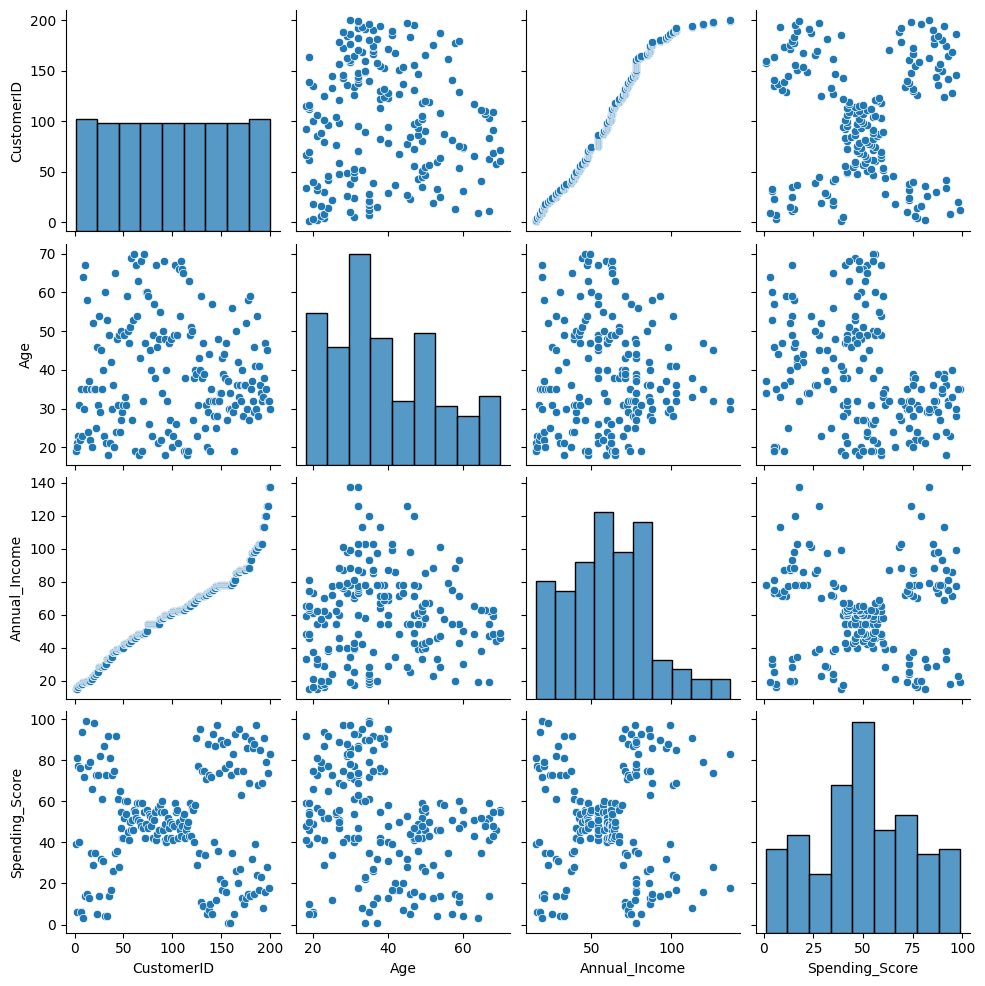

In [99]:
sns.pairplot(df)

<ipython-input-100-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

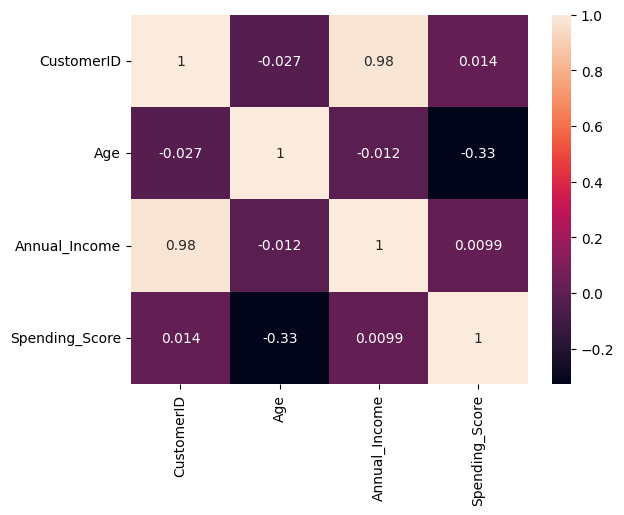

In [100]:

sns.heatmap(df.corr(),annot=True)

<Axes: >

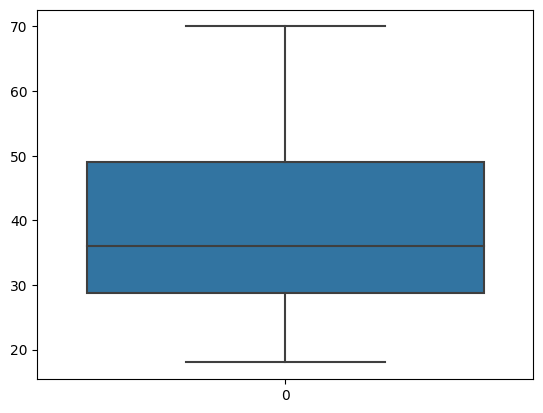

In [101]:
#detecting outliers
sns.boxplot(df.Age)

<Axes: >

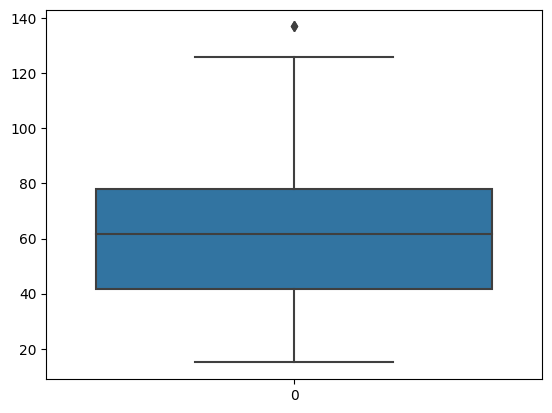

In [103]:
sns.boxplot(df.Annual_Income)
#outlier detected

<Axes: >

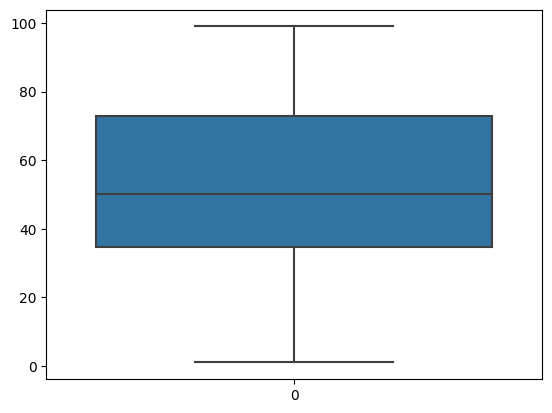

In [104]:
sns.boxplot(df.Spending_Score)

In [107]:
#outlier detected in Annual income so we have to remove it.

q1 = df.Annual_Income.quantile(0.25) #Q1
q3 = df.Annual_Income.quantile(0.75) #Q3
print(q1)
print(q3)

41.5
78.0


In [108]:
IQR = q3-q1
IQR

36.5

In [109]:

upper_limit = q3+1.5*IQR
upper_limit

132.75

In [110]:

lower_limit =q1-1.5*IQR
lower_limit

-13.25

In [112]:
df.median()

<ipython-input-112-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


CustomerID        100.5
Age                36.0
Annual_Income      61.5
Spending_Score     50.0
dtype: float64

In [113]:
df['Annual_Income'] = np.where(df['Annual_Income']>upper_limit,61.5,df['Annual_Income'])

<Axes: >

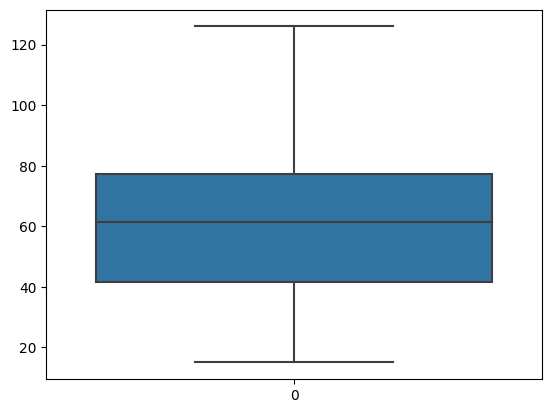

In [114]:
sns.boxplot(df.Annual_Income)
#outlier has been removed

In [115]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


Label Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [117]:
df.Gender = le.fit_transform(df.Gender)
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40
...,...,...,...,...,...
195,196,0,35,120.0,79
196,197,0,45,126.0,28
197,198,1,32,126.0,74
198,199,1,32,61.5,18


X and Y split independent and dependent varaible

In [123]:
y = df['CustomerID']
y


0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

In [125]:
X =df.drop(columns =['CustomerID'],axis =1)
X.head()


,Gender,Age,Annual_Income,Spending_Score
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


Scaling on independent variables

In [126]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [127]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [128]:
#data splitting :- training and splitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [129]:
X_train.shape

(140, 4)

In [130]:
X_test.shape

(60, 4)

In [132]:
y_train.shape

(140,)

In [133]:
y_test.shape

(60,)

In [136]:
X_train.head()

,Gender,Age,Annual_Income,Spending_Score
119,0.0,0.615385,0.468468,0.571429
110,1.0,0.903846,0.432432,0.520408
95,1.0,0.115385,0.405405,0.520408
167,0.0,0.288462,0.639640,0.959184
193,0.0,0.384615,0.882883,0.918367


# task 3 :   Machine Learning approach with clustering algorithm

In [137]:
from sklearn.cluster import KMeans

In [139]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters =  i)
    km.fit(df[['Annual_Income', 'Spending_Score']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [140]:
sse

[258182.89500000005,
 172650.47587316175,
 102283.01391906125,
 69614.42989643844,
 40494.033637799395,
 34728.61250605758,
 29292.895864976737,
 23894.598572800736,
 20785.743574527238]

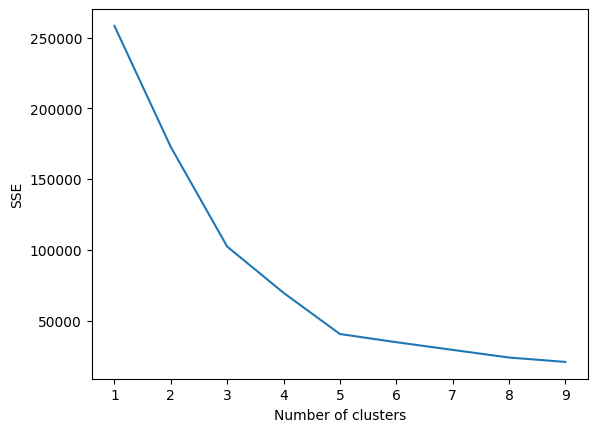

In [141]:
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.plot(range(1,10), sse)

In [143]:
km = KMeans(n_clusters = 5)
predicted = km.fit_predict(df[['Annual_Income', 'Spending_Score']])
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [144]:
df['Cluster'] = predicted
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,1,19,15.0,39,1
1,2,1,21,15.0,81,4
2,3,0,20,16.0,6,1
3,4,0,23,16.0,77,4
4,5,0,31,17.0,40,1
...,...,...,...,...,...,...
195,196,0,35,120.0,79,2
196,197,0,45,126.0,28,3
197,198,1,32,126.0,74,2
198,199,1,32,61.5,18,3


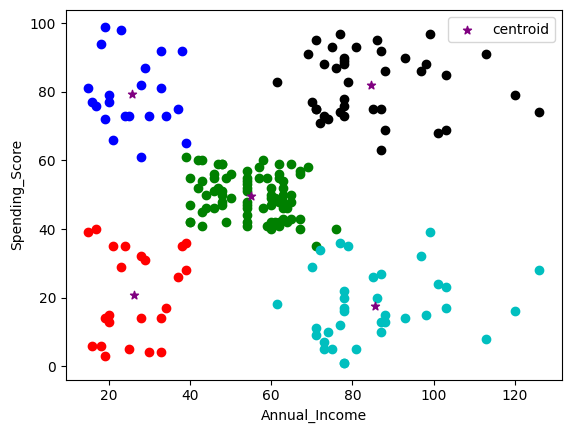

In [146]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]
plt.scatter(df1['Annual_Income'],df1['Spending_Score'],color='green')
plt.scatter(df2['Annual_Income'],df2['Spending_Score'],color='red')
plt.scatter(df3['Annual_Income'],df3['Spending_Score'],color='black')
plt.scatter(df4['Annual_Income'],df4['Spending_Score'],color='c')
plt.scatter(df5['Annual_Income'],df5['Spending_Score'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.legend()